In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from pklshop.data import *
from pklshop.stats import *
from pklshop.game import *

%load_ext autoreload
%autoreload 2

Let's see what insight we can glean from a single game. 

In [2]:
g = Game("G1")

In [3]:
g.summarize_game()
g.summarize_third_shots()

Anna Leigh Waters & Leigh Waters beat Jesse Irvine & Catherine Parenteau 12-10 in game G1
             Player  Error %  Winner %
       Jesse Irvine    17.46      9.52
Catherine Parenteau     1.59      0.00
  Anna Leigh Waters     1.59      3.17
       Leigh Waters     9.52      4.76
             Player  Drops %  Drives %  Lobs %  Total Thirds
       Jesse Irvine    94.12      5.88     0.0            17
Catherine Parenteau    75.00     25.00     0.0            12
  Anna Leigh Waters    75.00     25.00     0.0             4
       Leigh Waters    82.61     17.39     0.0            23


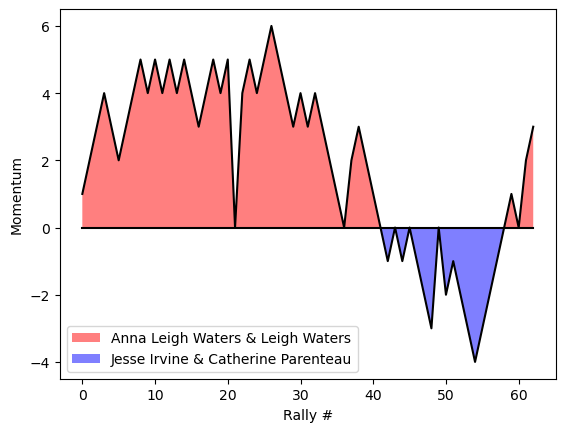

In [4]:
x = np.arange(0, len(g.momentum()))
y = g.momentum()

ax = sns.lineplot(x = [x[0], x[-1]], y = [0, 0], color = 'black')
sns.lineplot(ax = ax, x=x, y=y, color='black')

ypositive=y>=0
ynegative=y<=0

ax.fill_between(x, y, where=ypositive, facecolor = 'red', alpha = 0.5, label = g.w_team_name )
ax.fill_between(x, y, where=ynegative, facecolor = 'blue', alpha = 0.5, label = g.l_team_name )

plt.xlabel('Rally #')
plt.ylabel('Momentum')

plt.legend()

plt.show()

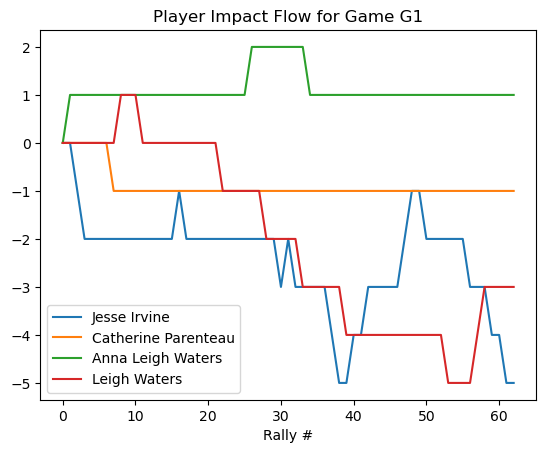

In [5]:
#Winners + Errors Forced on Opposing Team - Unforced Errors
g.plot_impact_flow() 